<b><font size="6">|012|Decision Tree|Diabetes Subset Prediction</font></b>

* **Author**: Dino Giovannoni
* **Date:**: 11-July-2024


In [38]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Import the dataset

In [39]:
df = pd.read_csv('diabetes1.csv')

display(df.head())
display(df.info())

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Outcome  768 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 18.1 KB


None

In [40]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


## Histogram Plots

Let's plot the histogram using **matplotlib**.

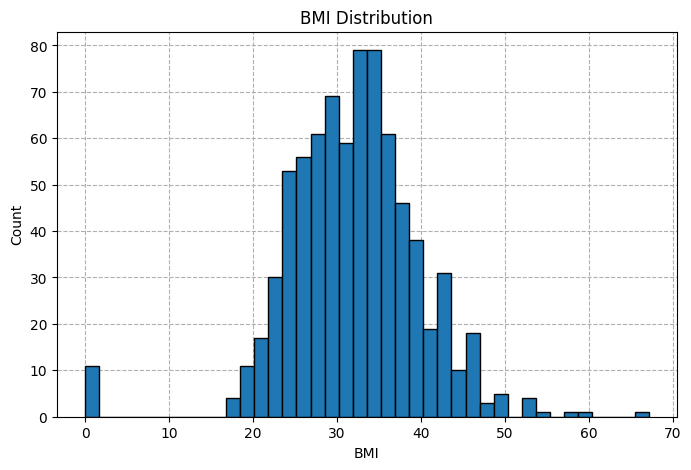

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["BMI"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

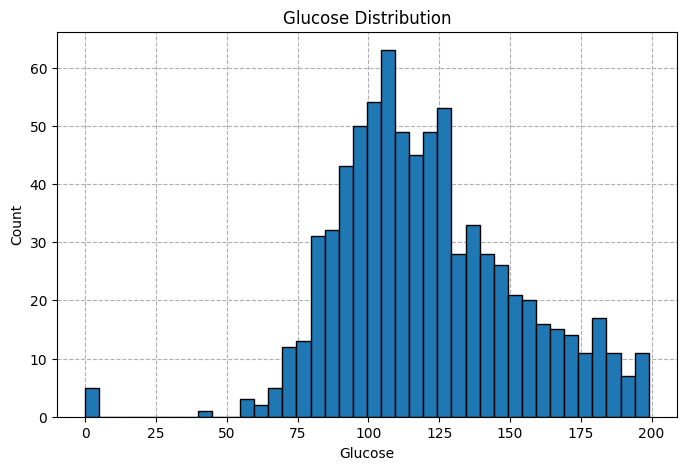

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["Glucose"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.show()

## Outlier removal

By simply looking at the histogram plot of the "Insulin" variable, we see that there are a lot of values equal to zero. This may skew the predictions, so we consider removing them.

In [43]:
df_filtered = df.copy()
df_filtered = df_filtered.loc[(df['Glucose'] != 0)]
df_filtered = df_filtered.loc[(df['BMI'] != 0)]
df_filtered.reset_index(drop=True, inplace=True)
display(df_filtered.info())

# df_filtered = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  752 non-null    int64  
 1   BMI      752 non-null    float64
 2   Outcome  752 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 17.8 KB


None

## Scatter Plots

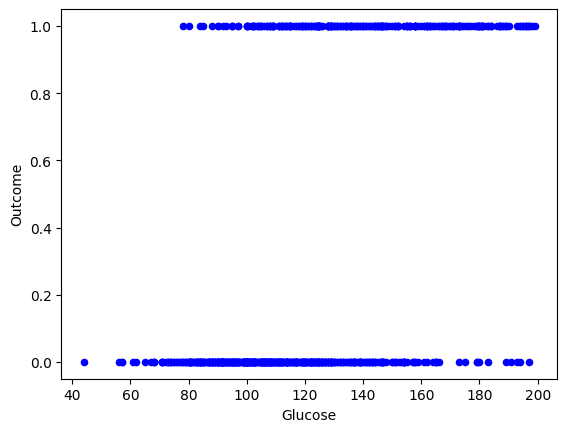

In [44]:
ax = df_filtered.plot.scatter(x='Glucose', y="Outcome", c='blue')

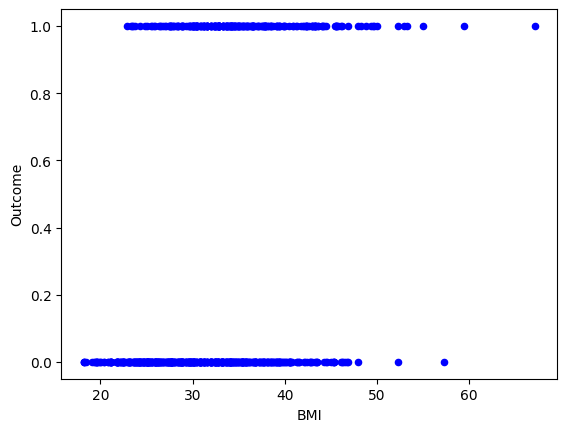

In [45]:
ax = df_filtered.plot.scatter(x="BMI", y="Outcome", c='blue')

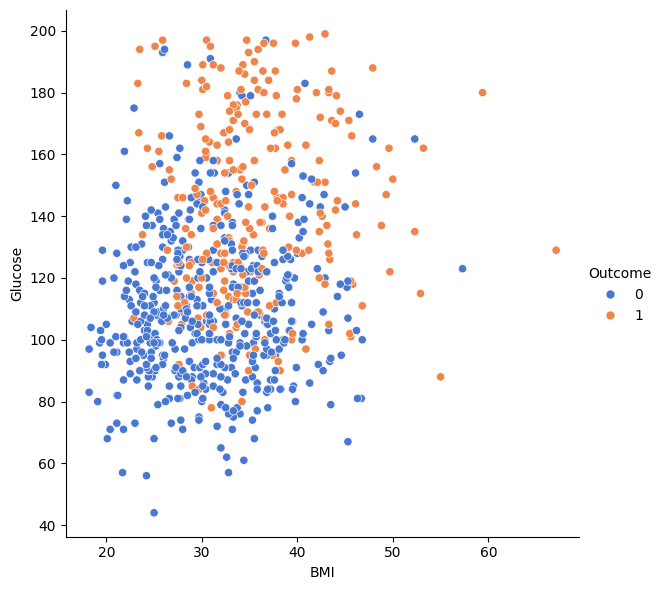

In [46]:
_ = sns.relplot(x="BMI", y="Glucose", hue="Outcome", palette="muted",
            height=6, data=df_filtered)

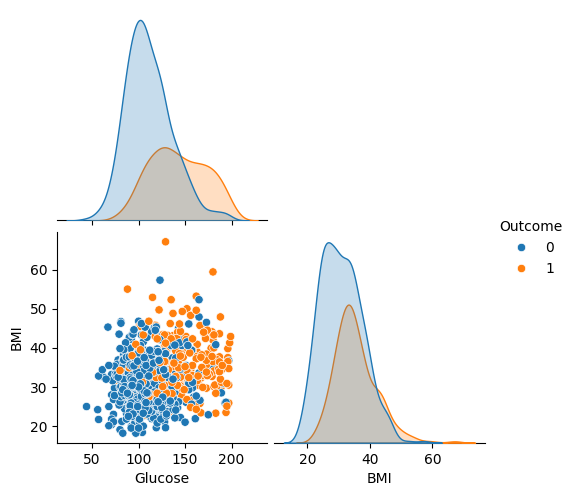

In [47]:
_ = sns.pairplot(data = df_filtered, hue="Outcome",corner = True)

# Model

In [48]:
X = df_filtered[["BMI","Glucose"]]
y = df_filtered["Outcome"]
display(X.head(), y.head())

,BMI,Glucose
0,33.6,148
1,26.6,85
2,23.3,183
3,28.1,89
4,43.1,137


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
display(X_test)

,BMI,Glucose
647,42.9,199
142,33.7,147
415,37.0,184
79,48.8,137
214,31.6,158
...,...,...
625,19.5,100
144,37.4,136
355,34.9,147
21,39.8,196


## Fit SVM Model

In [50]:
model = SVC(kernel = 'rbf') # Radial Basis Function
# model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Plot Data

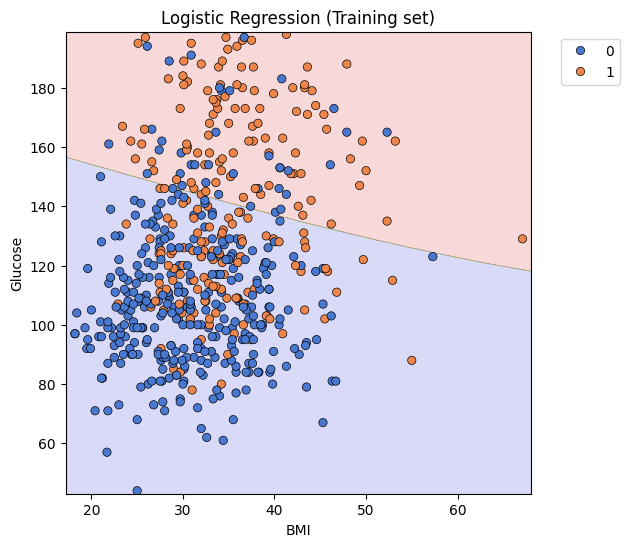

In [51]:
# Visualizing the Training set results
fig, ax = plt.subplots(figsize=(6, 6))# create subplots

X1, X2 = np.meshgrid(np.arange(start = X_train["BMI"].min() - 1, 
                               stop  =  X_train["BMI"].max() + 1, 
                               step  = 0.1),
                     np.arange(start = X_train["Glucose"].min() - 1, 
                               stop  = X_train["Glucose"].max() + 1, 
                               step = 0.1))

df_mesh = pd.DataFrame({"BMI": X1.ravel(), "Glucose": X2.ravel()} )

mesh_pred = model.predict(df_mesh)
ax.contourf(X1, X2, mesh_pred.reshape(X1.shape),
             alpha = 0.15, 
             cmap=plt.cm.jet
             # cmap = ListedColormap(('red', 'green'))
            )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

df_train = X_train.copy()
df_train["Outcome"] = y_train

_ = sns.scatterplot(x="BMI", 
                    y="Glucose", 
                    hue="Outcome", 
                    palette="muted",
                    data=df_train, 
                    ax=ax, 
                    edgecolor='black')

plt.title('Logistic Regression (Training set)')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


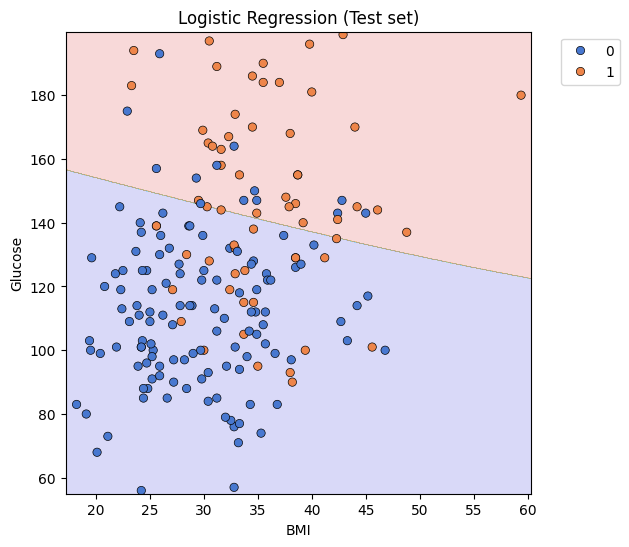

In [52]:
# Visualizing the Test set results
fig, ax = plt.subplots(figsize=(6, 6))# create subplots

X1, X2 = np.meshgrid(np.arange(start = X_test["BMI"].min() - 1, 
                               stop  =  X_test["BMI"].max() + 1, 
                               step  = 0.1),
                     np.arange(start = X_test["Glucose"].min() - 1, 
                               stop  = X_test["Glucose"].max() + 1, 
                               step = 0.1))

df_mesh = pd.DataFrame({"BMI": X1.ravel(), "Glucose": X2.ravel()} )

mesh_pred = model.predict(df_mesh)
ax.contourf(X1, X2, mesh_pred.reshape(X1.shape),
             alpha = 0.15, 
             cmap=plt.cm.jet
             # cmap = ListedColormap(('red', 'green'))
            )

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

df_test = X_test.copy()
df_test["Outcome"] = y_test

_ = sns.scatterplot(x="BMI", 
                    y="Glucose", 
                    hue="Outcome", 
                    palette="muted",
                    data=df_test, 
                    ax=ax, 
                    edgecolor='black')

plt.title('Logistic Regression (Test set)')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()


## The Confusion Matrix

### Training Data

[[322  37]
 [106  99]]


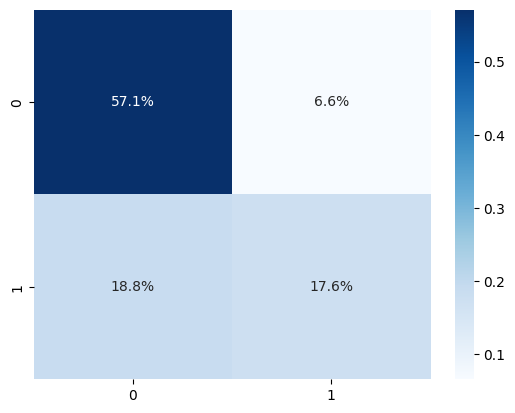

In [53]:
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
_ = sns.heatmap(cm_train/np.sum(cm_train), annot=True,cmap='Blues', fmt='.1%')

In [54]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

Train Accuracy: 74.6%


[[115  14]
 [ 25  34]]


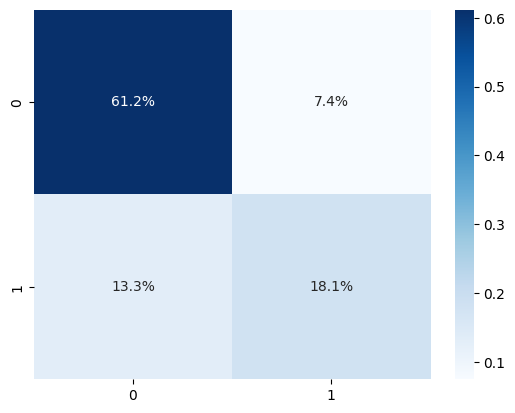

In [55]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True,cmap='Blues', fmt='.1%')

In [56]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Test Accuracy: 79.3%


## Calculate a specific case

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BMI,768.0,31.992578,7.884160,0.0,27.3,32.0,36.60,67.1
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


In [58]:
X_point = pd.DataFrame({"BMI": 38, "Glucose": 180}, index=[0])
display(X_point)

,BMI,Glucose
0,38,180


In [59]:
prediction = model.predict(X_point)#[:, 1]
print(f'Prediction of somebody of BMI =38, Glucose = 140  getting diabetes {prediction[0]}')

Prediction of somebody of BMI =38, Glucose = 140  getting diabetes 1
